In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

Put the hyparameters at the top like this to make it easier to change and edit.

In [4]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [5]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [6]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [7]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [8]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [9]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [10]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 642, 587, 225, 4995, 1, 1, 1662, 1, 1, 2432, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4737, 1, 1, 122, 4513, 1, 2, 2875, 1506, 352, 4738, 1, 52, 341, 1, 352, 2173, 3961, 41, 22, 3794, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2367, 347, 4739, 1, 365, 22, 1, 787, 2368, 1, 4301, 138, 10, 1, 3665, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 599, 1, 1693, 1021, 1, 4997, 807, 1863, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1608, 4998, 543, 492, 1, 1446, 4740, 778, 1320, 1, 1860, 10, 33, 642, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 565, 22, 2972, 4734, 1, 1, 1, 1, 1, 850, 39, 1824, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4302, 247]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [11]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [13]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 642, 587, 225, 4995, 1, 1, 1662, 1, 1, 2432, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4737, 1, 1, 122, 4513, 1, 2, 2875, 1506, 352, 4738, 1, 52, 341, 1, 352, 2173, 3961, 41, 22, 3794, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2367, 347, 4739, 1, 365, 22, 1, 787, 2368, 1, 4301, 138, 10, 1, 3665, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 599, 1, 1693, 1021, 1, 4997, 807, 1863, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1608, 4998, 543, 492, 1, 1446, 4740, 778, 1320, 1, 1860, 10, 33, 642, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 565, 22, 2972, 4734, 1, 1, 1, 1, 1, 850, 39, 1824, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4302, 247]


In [14]:
print(train_padded[10])

[2432    1  225 4995   22  642  587  225 4995    1    1 1662    1    1
 2432   22  565    1    1  140  278    1  140  278  796  822  662 2308
    1 1144 1693    1 1720 4996    1    1    1    1    1 4737    1    1
  122 4513    1    2 2875 1506  352 4738    1   52  341    1  352 2173
 3961   41   22 3794    1    1    1    1  543    1    1    1  835  631
 2367  347 4739    1  365   22    1  787 2368    1 4301  138   10    1
 3665  682 3531    1   22    1  414  822  662    1   90   13  633    1
  225 4995    1  599    1 1693 1021    1 4997  807 1863  117    1    1
    1 2975   22    1   99  278    1 1608 4998  543  492    1 1446 4740
  778 1320    1 1860   10   33  642  319    1   62  478  565  301 1507
   22  479    1    1 1665    1  797    1 3067    1 1365    6    1 2432
  565   22 2972 4734    1    1    1    1    1  850   39 1824  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4302  247    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [15]:
print(train_sequences[0])

[91, 160, 1141, 1106, 49, 979, 755, 1, 89, 1304, 4288, 129, 175, 3654, 1215, 1195, 1577, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3262, 1216, 2422, 570, 451, 1376, 58, 3378, 3521, 1660, 8, 921, 730, 10, 844, 1, 9, 598, 1578, 1107, 395, 1939, 1106, 731, 49, 538, 1398, 2011, 1623, 134, 249, 113, 2356, 795, 4980, 980, 584, 10, 3955, 3956, 921, 2563, 129, 344, 175, 3654, 1, 1, 39, 62, 2868, 28, 9, 4722, 18, 1305, 136, 416, 7, 143, 1423, 71, 4500, 436, 4981, 91, 1107, 77, 1, 82, 2012, 53, 1, 91, 6, 1008, 609, 89, 1304, 91, 1963, 131, 137, 420, 9, 2869, 38, 152, 1235, 89, 1304, 4723, 7, 436, 4981, 3154, 6, 2493, 1, 431, 1126, 1, 1424, 571, 1217, 1901, 1, 766, 9, 538, 1398, 2011, 134, 2068, 400, 845, 1964, 1601, 34, 1716, 2870, 1, 1, 2423, 244, 9, 2625, 82, 732, 6, 1173, 1196, 152, 720, 591, 1, 124, 28, 1305, 1689, 432, 83, 933, 115, 20, 14, 18, 3155, 1, 37, 1485, 1, 23, 37, 87, 335, 2357, 37, 467, 255, 1964, 1359, 328, 1, 299, 732, 1174, 18, 2871, 1716, 1, 294, 756, 1074, 395, 2013, 387, 431

In [16]:
print(train_padded[0])

[  91  160 1141 1106   49  979  755    1   89 1304 4288  129  175 3654
 1215 1195 1577   42    7  893   91    1  334   85   20   14  130 3262
 1216 2422  570  451 1376   58 3378 3521 1660    8  921  730   10  844
    1    9  598 1578 1107  395 1939 1106  731   49  538 1398 2011 1623
  134  249  113 2356  795 4980  980  584   10 3955 3956  921 2563  129
  344  175 3654    1    1   39   62 2868   28    9 4722   18 1305  136
  416    7  143 1423   71 4500  436 4981   91 1107   77    1   82 2012
   53    1   91    6 1008  609   89 1304   91 1963  131  137  420    9
 2869   38  152 1235   89 1304 4723    7  436 4981 3154    6 2493    1
  431 1126    1 1424  571 1217 1901    1  766    9  538 1398 2011  134
 2068  400  845 1964 1601   34 1716 2870    1    1 2423  244    9 2625
   82  732    6 1173 1196  152  720  591    1  124   28 1305 1689  432
   83  933  115   20   14   18 3155    1   37 1485    1   23   37   87
  335 2357   37  467  255 1964 1359  328    1  299  732 1174   18 2871
 1716 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [17]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [18]:
print(set(labels))

{'tech', 'politics', 'sport', 'business', 'entertainment'}


In [19]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [20]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [21]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [22]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/10
1780/1780 - 10s - loss: 1.6322 - accuracy: 0.2635 - val_loss: 1.4729 - val_accuracy: 0.2674
Epoch 2/10
1780/1780 - 5s - loss: 1.0612 - accuracy: 0.5809 - val_loss: 0.7554 - val_accuracy: 0.7393
Epoch 3/10
1780/1780 - 5s - loss: 0.3791 - accuracy: 0.8685 - val_loss: 0.3497 - val_accuracy: 0.8809
Epoch 4/10
1780/1780 - 5s - loss: 0.1476 - accuracy: 0.9556 - val_loss: 0.2603 - val_accuracy: 0.9146
Epoch 5/10
1780/1780 - 5s - loss: 0.0444 - accuracy: 0.9910 - val_loss: 0.3338 - val_accuracy: 0.9101
Epoch 6/10
1780/1780 - 5s - loss: 0.0185 - accuracy: 0.9961 - val_loss: 0.2438 - val_accuracy: 0.9326
Epoch 7/10
1780/1780 - 5s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2118 - val_accuracy: 0.9438
Epoch 8/10
1780/1780 - 5s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2476 - val_accuracy: 0.9371
Epoch 9/10
1780/1780 - 5s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2752 - val_accuracy: 0.9371
Epoch 10/10
1780/1780 - 5s - loss:

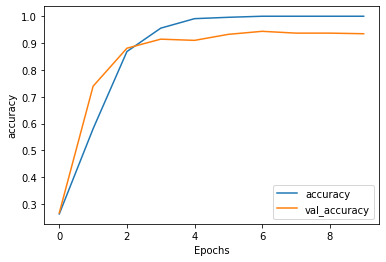

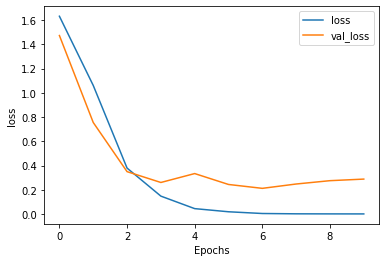

In [26]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred, labels[np.argmax(pred)])

[[2.2909015e-05 9.8399794e-01 1.0172065e-03 5.7833669e-05 1.3471981e-02
  1.4321870e-03]] bussiness
